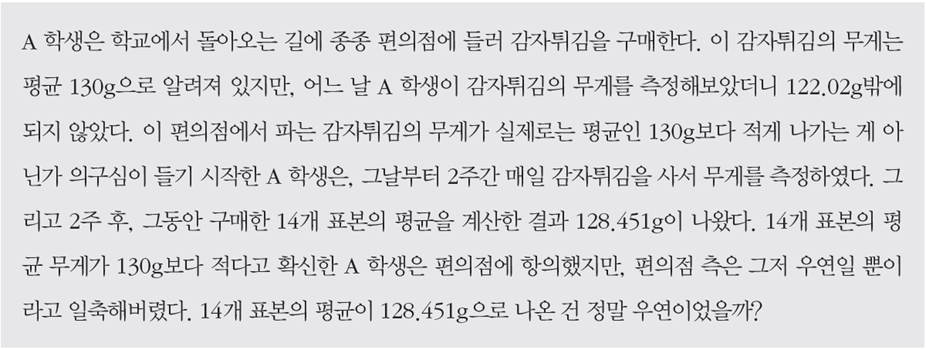

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

%precision 3
np.random.seed(1111)


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
df = pd.read_csv('C:/Users\Administrator/Desktop/coding/python/muticam/jupyter note/data/data//ch11_potato.csv')
sample = np.array(df['무게'])
sample


array([122.02, 131.73, 130.6 , 131.82, 132.05, 126.12, 124.43, 132.89,
       122.79, 129.95, 126.14, 134.45, 127.64, 125.68])

In [4]:
# 표본평균 확인


s_mean=np.mean(sample)
s_mean

128.4507142857143

### 통계적 가설 검정이란?

- 모집단의 모수에 고나하여 두 가지 가설을 세우고, 표본으로부터 계산되는 통계량을 이용하여 어느 가설이 옳은지 판단하는 통계적 방법

- A학생이 확인하고 싶은 것은 모평균이 130g보다 적은지 여부

### 통계적 가설검정의 흐름

- A학생이 감자튀김에 관하여 확인하고 싶은 것은 모평균이 130g보다 적은지 여부 임
    - 여기서는 감자튀김의 모집단이 정규분포를 따르고 있고, 모분산이 9임을 알고 있다고 전제

- 가정은 ‘모평균이 130g’
- 감자튀김 표본 14개는 독립성을 띄고 X1,X2,X3,...,X14 ~ N(130,9) 를 따르고 표본평균은 N(130,9/14)를 따른다


- 표본평균 $\overline{x}$ 가 P($\overline{X}$ <= x) = 0.05를 만족하는 x를 생각


In [5]:
rv=stats.norm(130,np.sqrt(9/14))

rv.isf(0.95)

128.68118313069039

In [6]:
# 일어나기 어려운 확률이다라고 예상됨

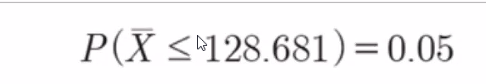

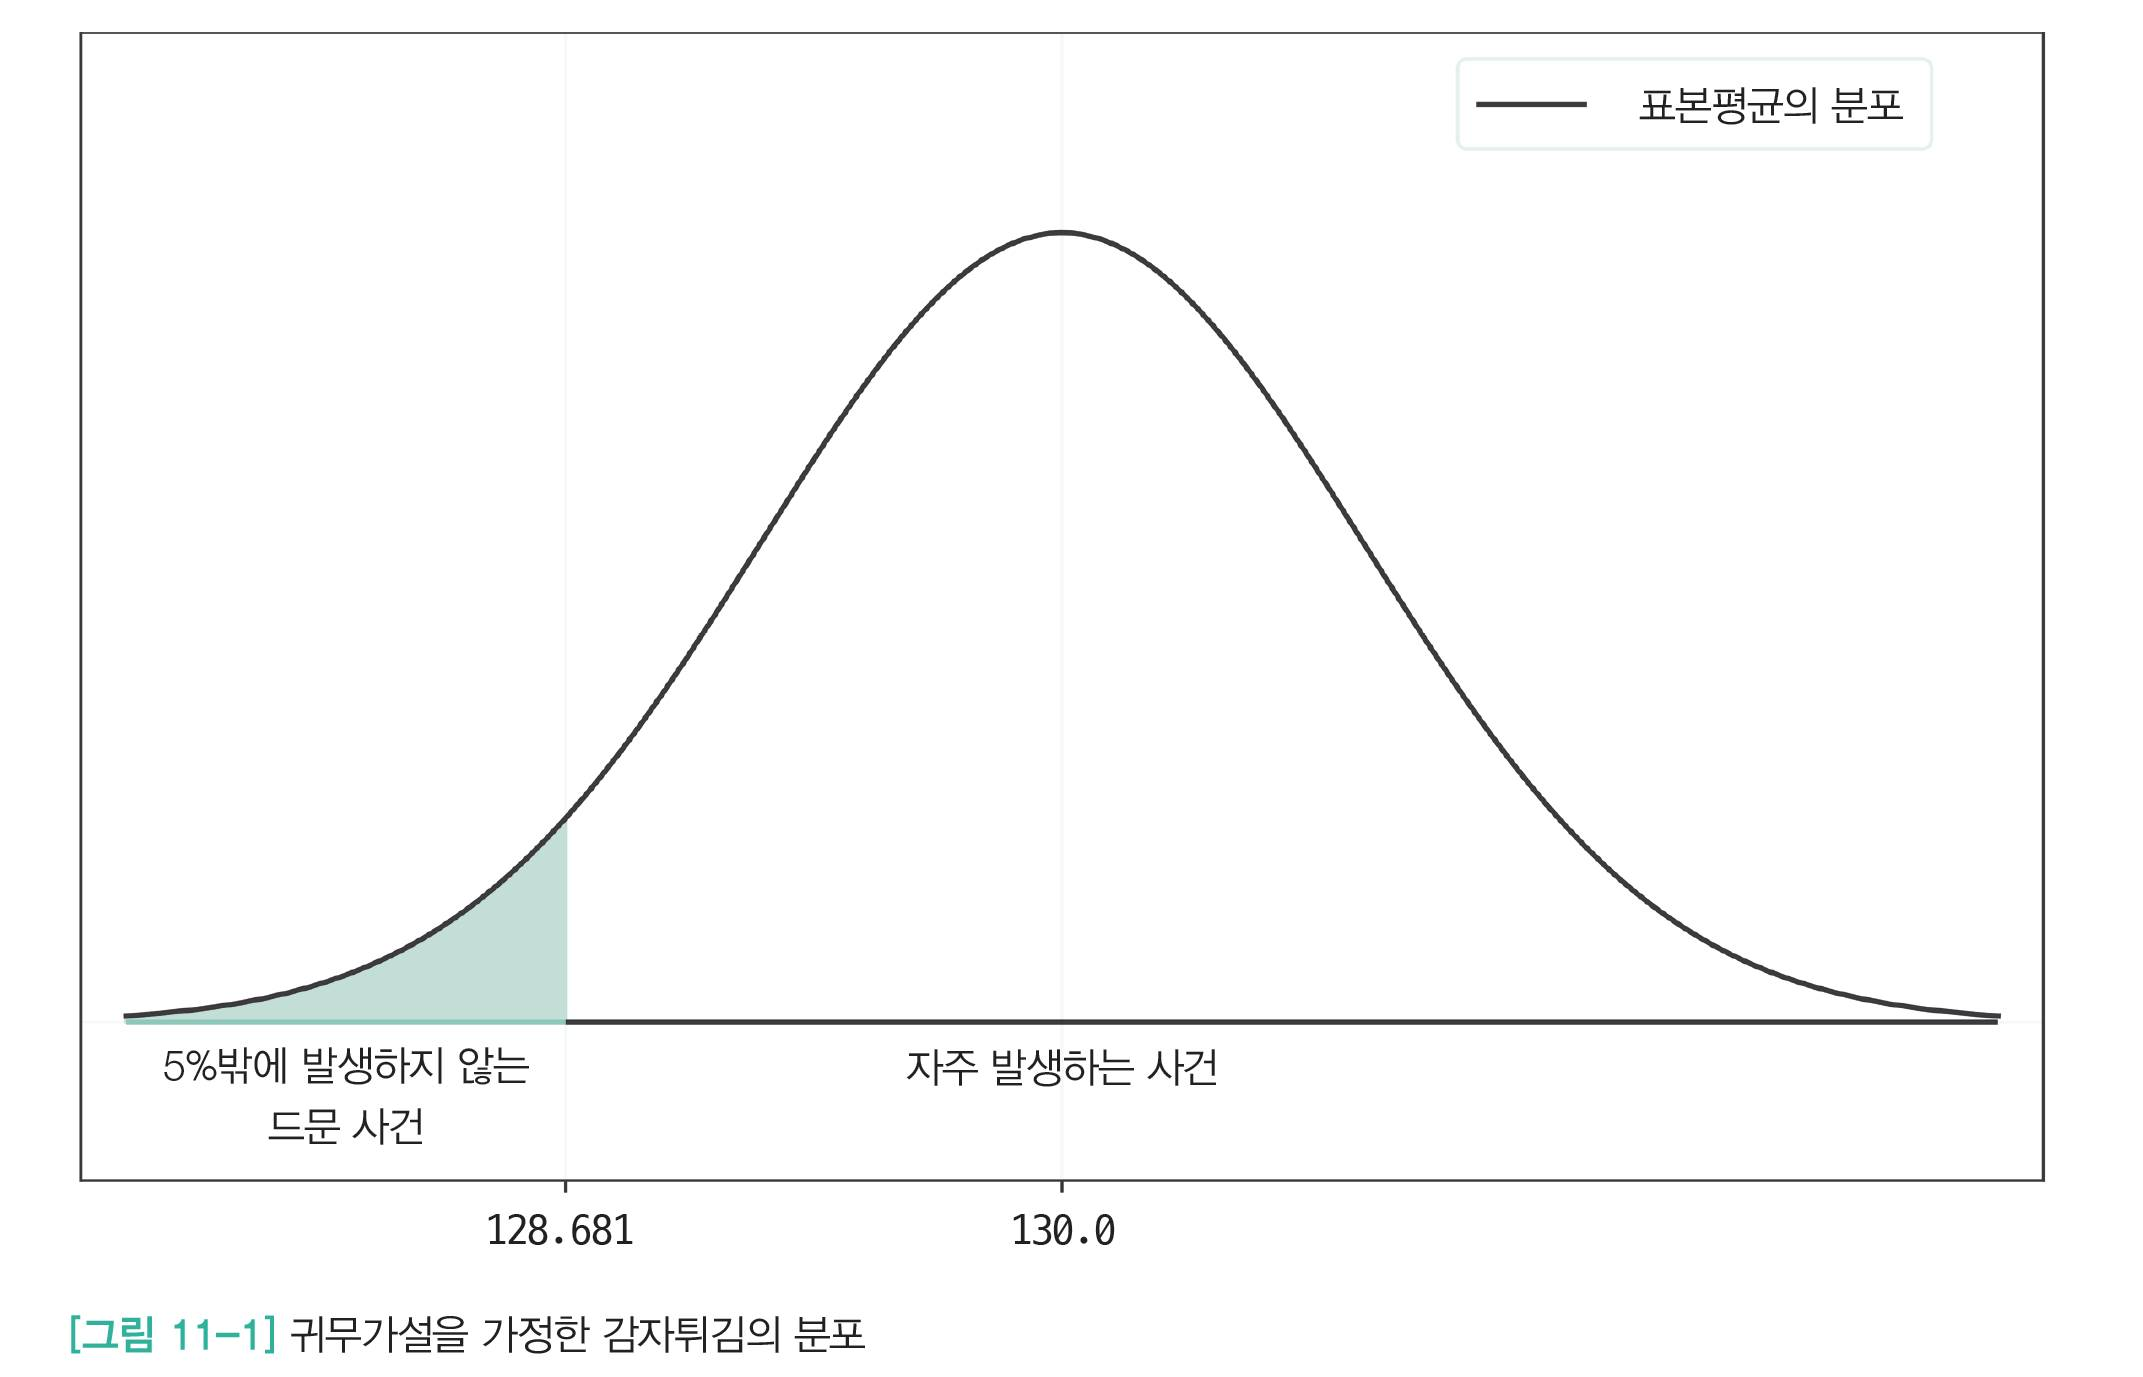

-표본평균이 128.681g 이하의 무게가 되는것은 5%의 확률로 발생하는 드문 사건

- 대립가설: 주장하고 싶은 가설 
    - 예: “차이가 있다”, “효과가 있다”

- 귀무가설: 대립가설과 반대 
    - 예: “차이가 없다”, “효과가 없다”

- 가설검정의 결론
    - 귀무가설을 기각한다: 귀무가설은 옳지 않다
    - 귀무가설을 채택한다: 귀무가설이 옳지 않다고 말할 수 없다


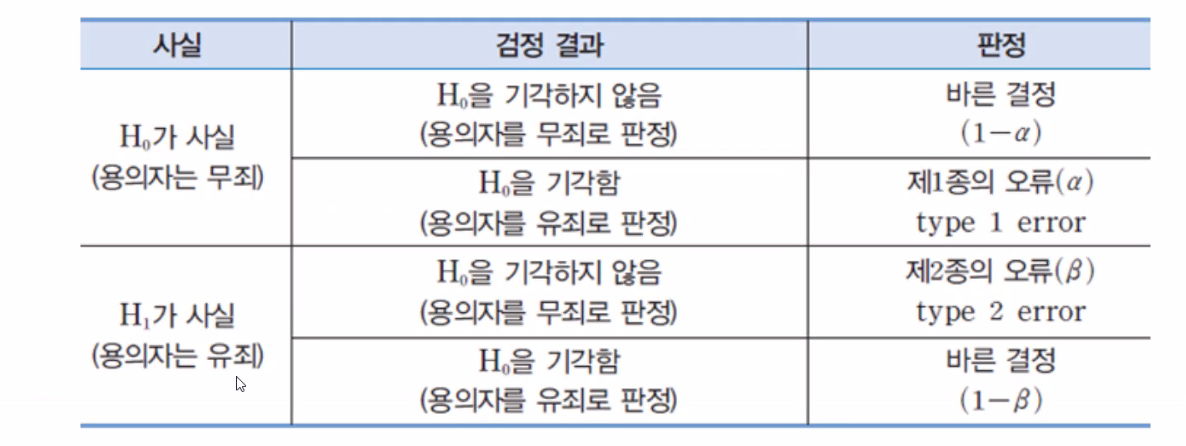

- ‘귀무가설을 기각한다/채택한다’의 판단은 귀무가설의 가정을 바탕으로 했을 때 표본으로부터 계산되는 통계량이 드문 값인지 여부로 결정
- 드문 값을 얻으면, 우연이 아니라 의미 있는 값이라고 생각하여 귀무가설을 기각
    - 유의하다: 우연이 아니라 의미가 있다
        
        

- 귀무가설 ‘모평균은 130g이다’라는 가정을 바탕으로 했을 때 표본평균이 128.451g이 되는 것은 유의하므로 귀무가설은 기각
    - 표본평균이 128.681g보다 작다면 귀무가설은 기각되고, 128.681g보다 크다면 귀무가설을 채택


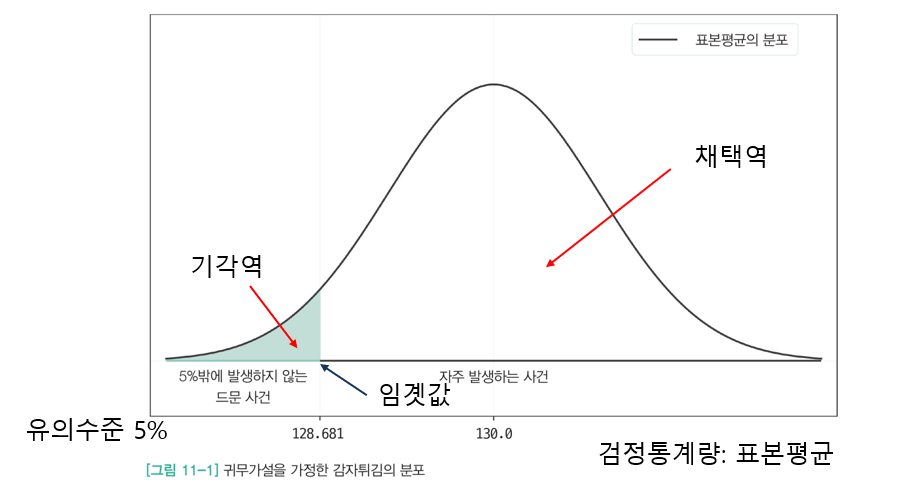

In [7]:
# 대립가설:130g보다 작다..(130g 아니다와는 조금 다르다.)

# 유의수준은 사람이 설정할수 있다.

- p값과 유의수준

- p값이 유의수준보다 작으면 귀무가설을 기각

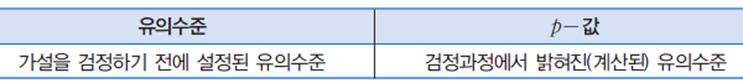

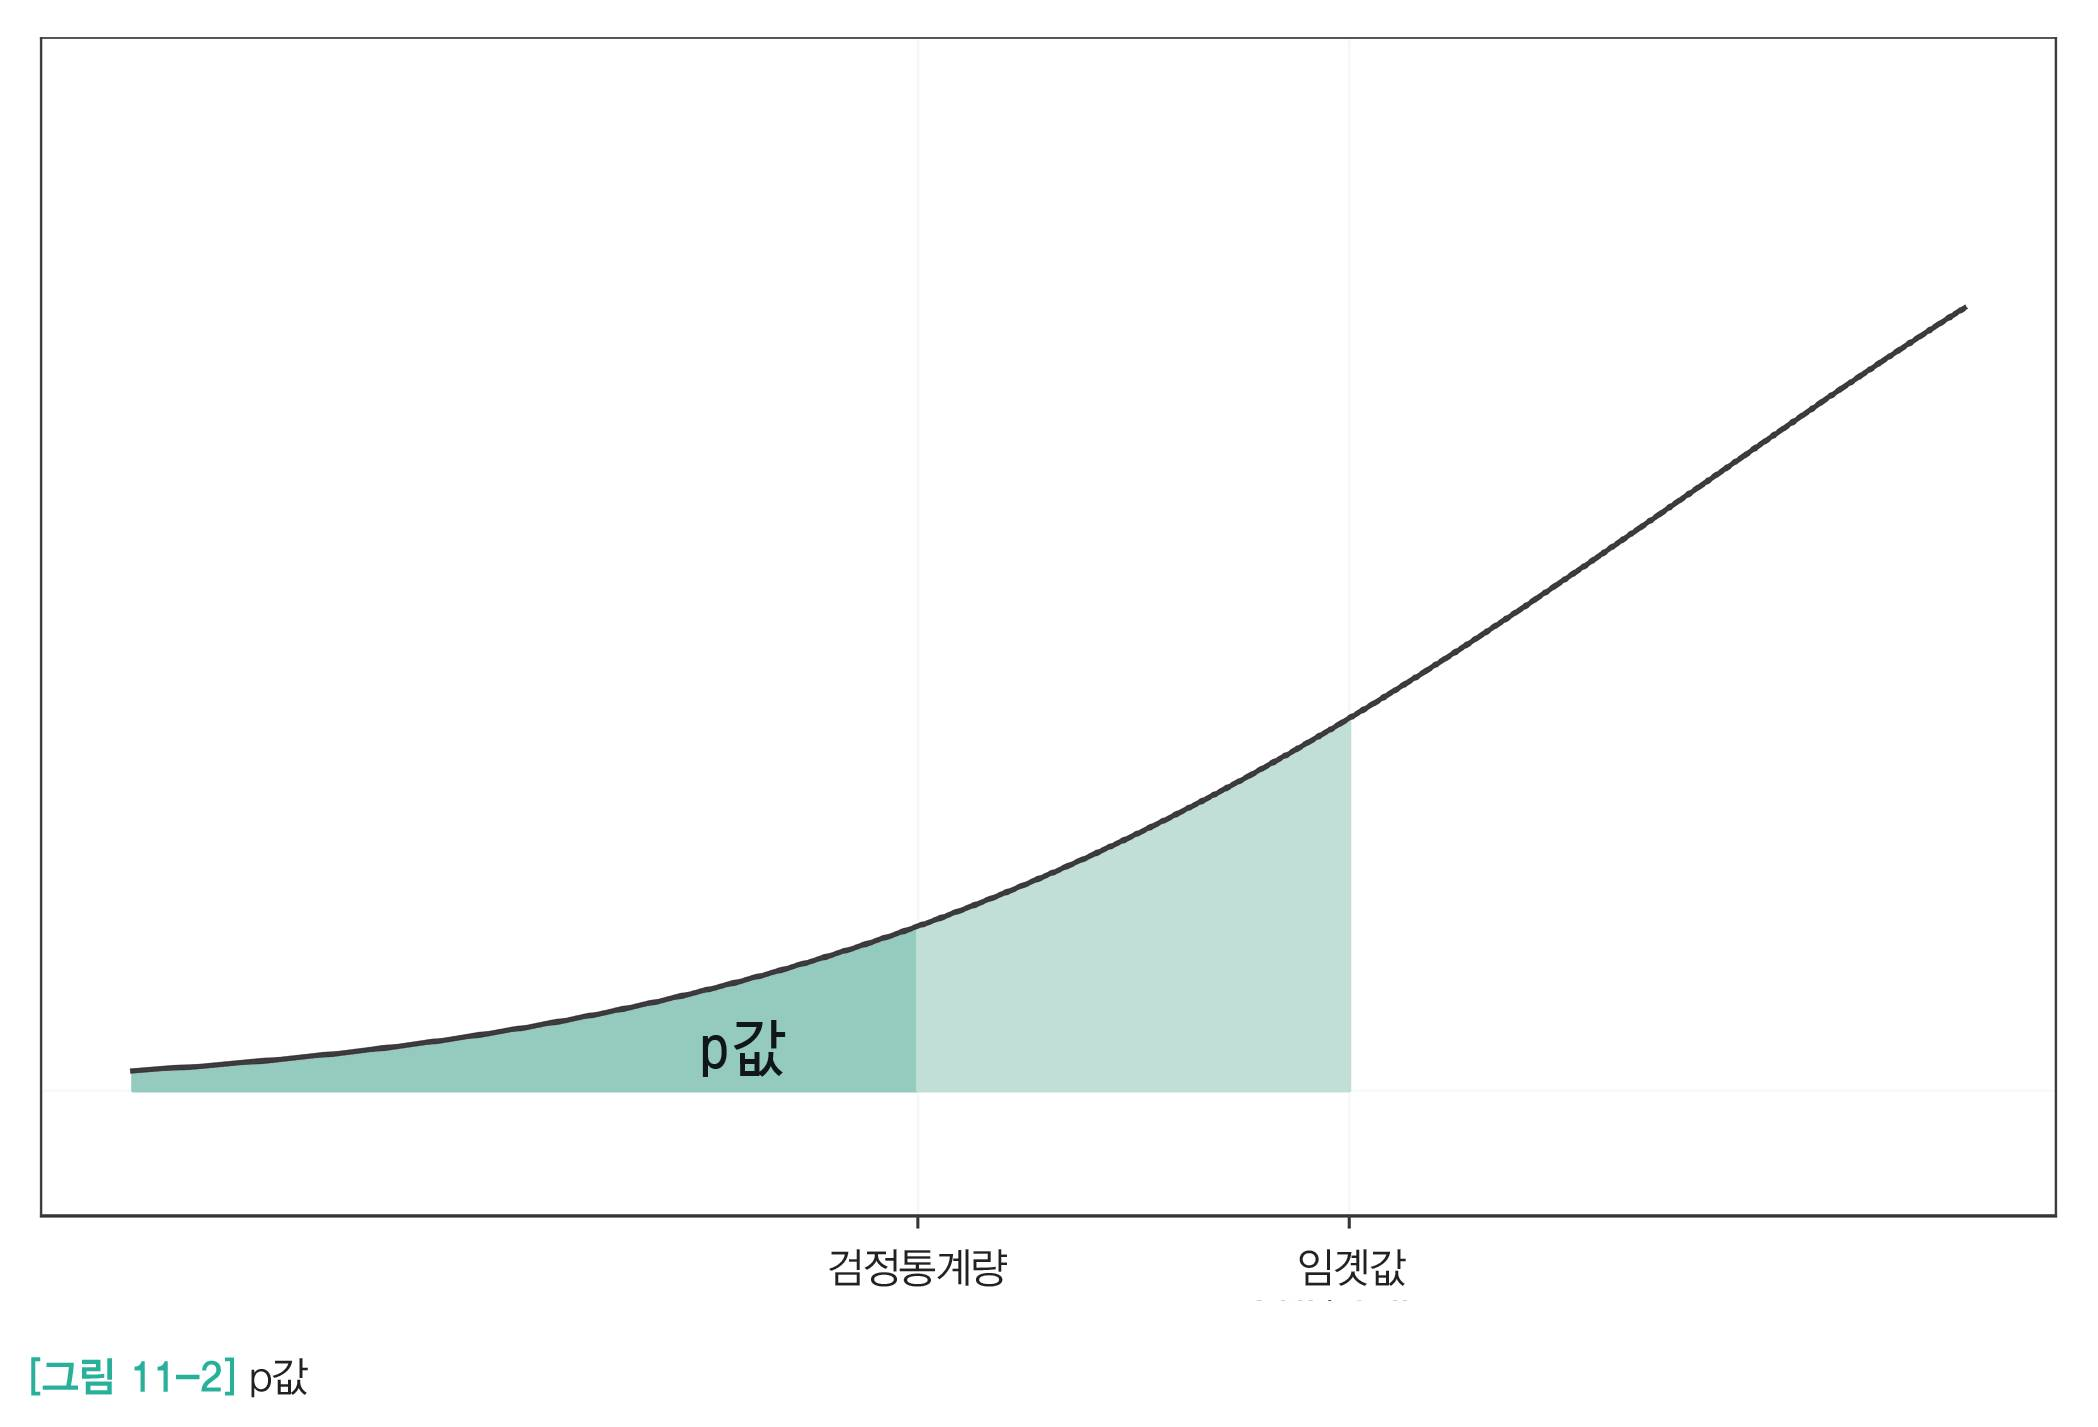


- p 값은 누적분포함수로 구할 수 있음


### 검정 통계량 z는 아래와 같이 설정하자

    - 유의 수준은 0.05(5%)로 설정

In [8]:
# 임곗값: 5% 수치일떄의 값  128.681
# 검정통계량 : 측정값       128.451

In [9]:
# 검정 통계량
s_mean= np.mean(sample)  # 감자튀김 14개의 무게 data인 sample의 평균


z=(s_mean-130)/np.sqrt(9/14)
z

-1.932298779026813

In [10]:
rv=stats.norm()
rv.isf(0.95)

-1.6448536269514722

In [11]:
# 확률변수 rv를 이용한 p값 계산

rv.cdf(z)

0.026661319523126635

In [12]:
# 귀무가설을 기각해야한다~!!라고 해석됨

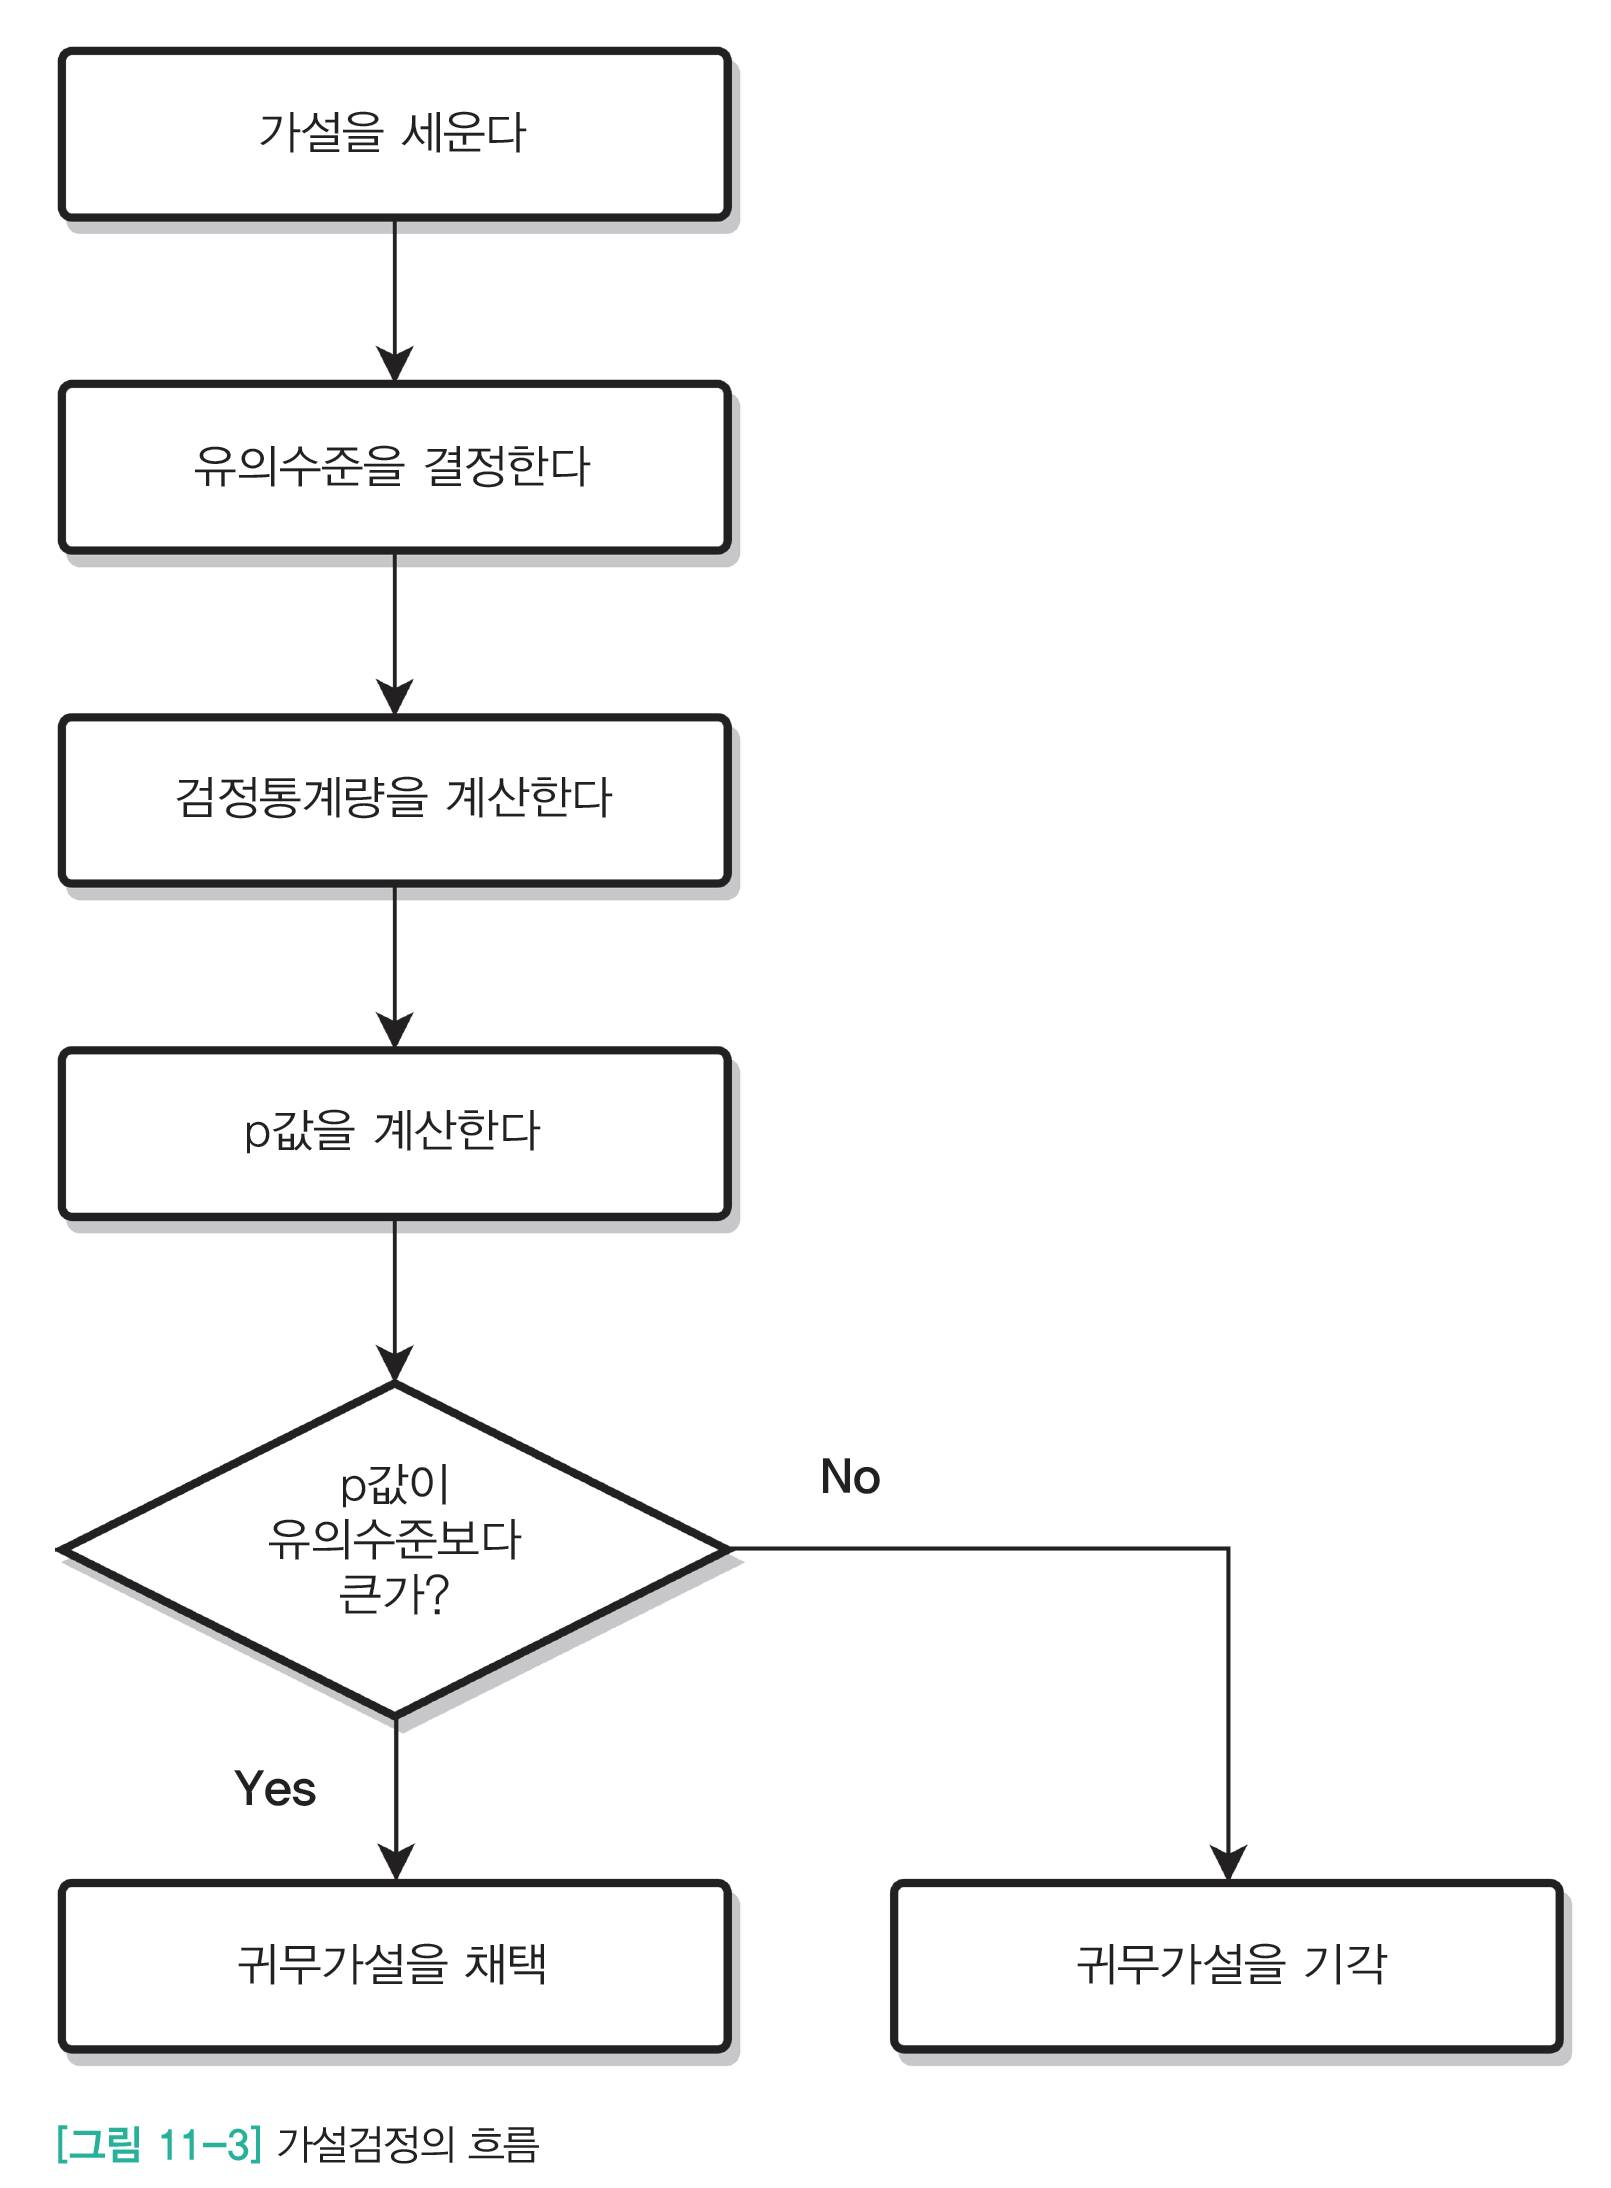

### 단측검정과 양측검정

- 모평균은 130보다 작다=>단측검정 라는 대립가설이 아닌 모평균은 130g이 아니다라는 대립가설로 가설 검정 수행    


    - 모평균이 130g보다 작은 경우와 큰 경우도 고려하게 됨 => 양측 검정
    
- 동일한 유의수준 $\alpha$ 의 검정이라도 단측 검정 쪽의 기각역이 넓어진다. 
    - 단측검정은 양측검정보다 귀무가설을 기각하기 쉽다


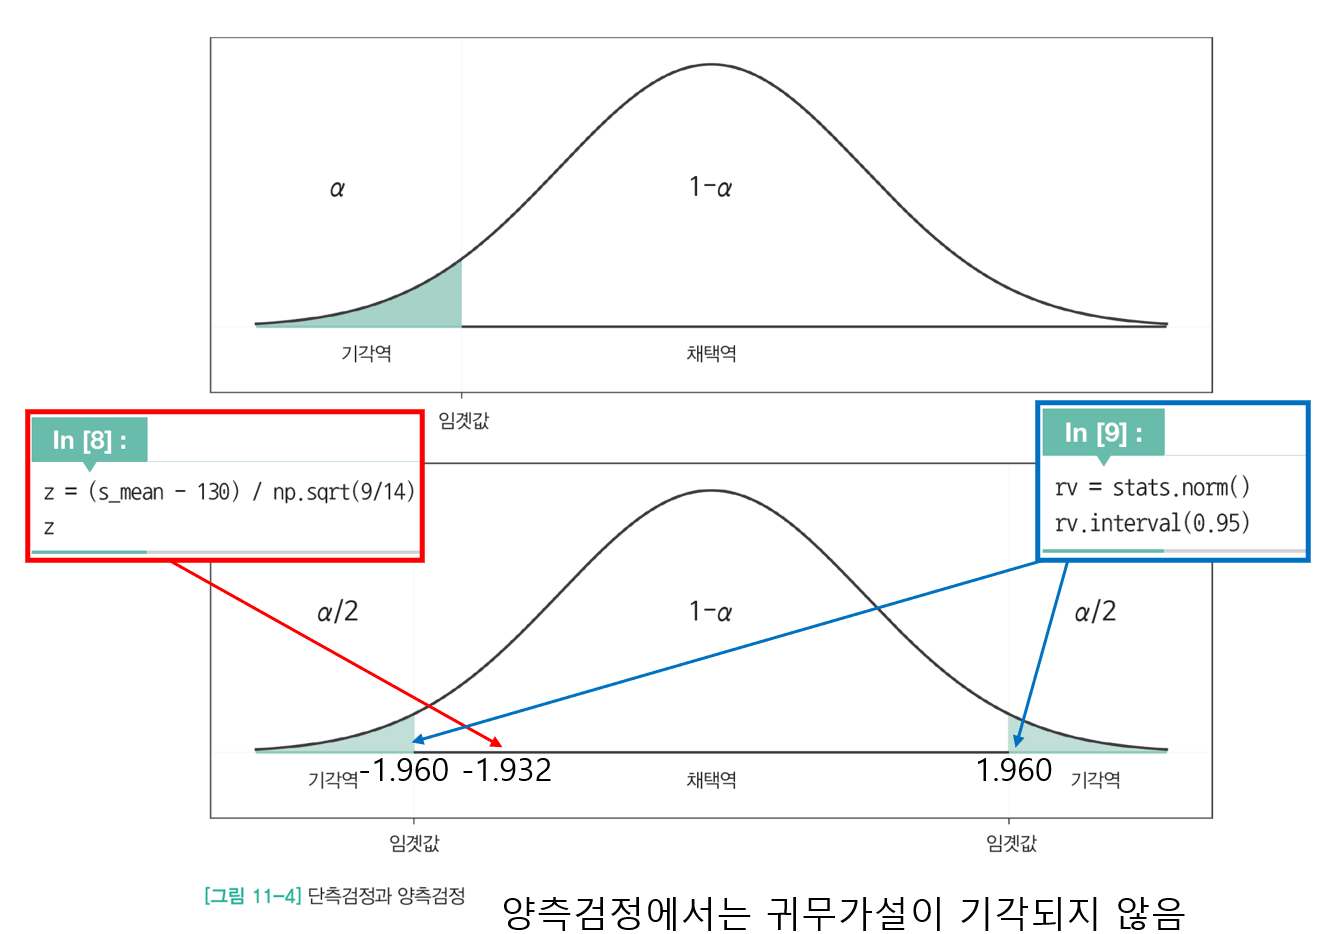

In [13]:
# 검정통계량은  단측 검정과 동일하다.


In [14]:
# 검정 통계량
s_mean= np.mean(sample)  # 감자튀김 14개의 무게 data인 sample의 평균


z=(s_mean-130)/np.sqrt(9/14)
z

-1.932298779026813

In [15]:
# 양측 검정이므로 임곗값은 표준 정규분포의 95% 구간에 따라 구할 수 있음
rv=stats.norm()
rv.interval(0.95)

(-1.959963984540054, 1.959963984540054)

- 임곗값과 검정 통계량을 비교해 보면 검정통계량이 채택역에 들어 있다. => 귀무가설이 기각되지 않는다


In [16]:
# 양측검정의 p값을 구할 때는 상단과 하단의 양쪽 면적을 고려할 필요가 있으므로 누적밀도함수의 값을 2배로 함


In [17]:
rv.cdf(z)*2

0.05332263904625327

- p값의 유의 수준이 0.05보다 큼 => 귀무가설은 기각되지 않는다


### 가설검정에서의 두 가지 오류


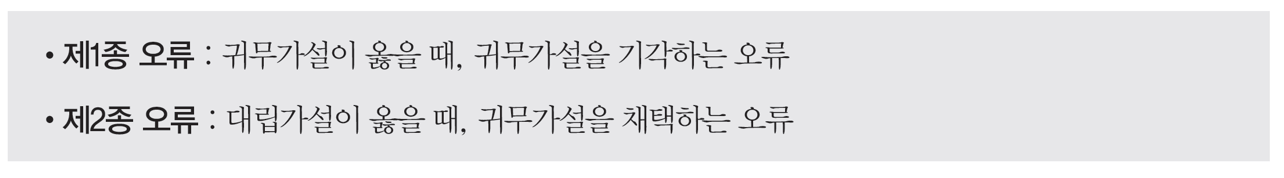

- 제1종 오류
    - 실제로 ‘평균이 130g’인데도 ‘평균은 130g보다 작다’라는 결론을 내리는 상황
    - 본래 검출하지 말아야 할 것을 검출한 것이므로 오탐(false negative)
    - 위험률: 제1종 오류를 범하는 확률 $\alpha$

- 제2종 오류
    - 실제로 ‘평균이 130g보다 작다’인데도 ‘평균은 130g보다 작다’라는 결론을 얻을 수 없는 상황
    - 본래 검출해야 하는 것을 검출하지 못했으므로 미탐(false negative)
